<a href="https://colab.research.google.com/github/Basytism/-PORTFOLIO-PROJECT-SET/blob/main/legal_sentiment_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# 🎯 Objective**

AI-powered NLP tool that classifies legal statements or court text into positive, neutral, or negative sentiment that is helpful for law firms, policy analysts, or justice tech apps.

# 💼 Ideal Use Case
1. This could be used to:

2. Analyze tone of judgments, FIRs, contracts

3. Track public opinion in legal blogs or media

4. Detect emotional bias in court submissions

In [22]:
import pandas as pd
import random

positive_legal_texts = [
    "The court finds in favor of the petitioner, awarding full damages.",
    "This agreement is mutually beneficial and shall continue in good faith.",
    "The terms are considered fair and equitable to both parties.",
    "The accused was released due to lack of evidence.",
    "The court appreciates the cooperative nature of both legal counsels."
]

negative_legal_texts = [
    "The contract was breached with malicious intent.",
    "The defendant is found guilty on all charges.",
    "This appeal is frivolous and lacks merit.",
    "The evidence presented was intentionally misleading.",
    "The plaintiff suffered irreparable harm due to the negligence of the defendant."
]

neutral_legal_texts = [
    "The hearing is adjourned until next Monday.",
    "The parties are advised to submit their statements before the next session.",
    "This case involves multiple jurisdictions and complex statutory issues.",
    "The respondent was present in court on the mentioned date.",
    "The law requires a mandatory waiting period before enforcement."
]

# Combine and shuffle
texts = positive_legal_texts + negative_legal_texts + neutral_legal_texts
labels = ['positive'] * 5 + ['negative'] * 5 + ['neutral'] * 5
combined = list(zip(texts, labels))
random.shuffle(combined)

df = pd.DataFrame(combined, columns=["Text", "Label"])
df.to_csv("sample_legal_sentiment.csv", index=False)
df.head()




,Text,Label
0,The parties are advised to submit their statem...,neutral
1,The defendant is found guilty on all charges.,negative
2,This case involves multiple jurisdictions and ...,neutral
3,The hearing is adjourned until next Monday.,neutral
4,This appeal is frivolous and lacks merit.,negative


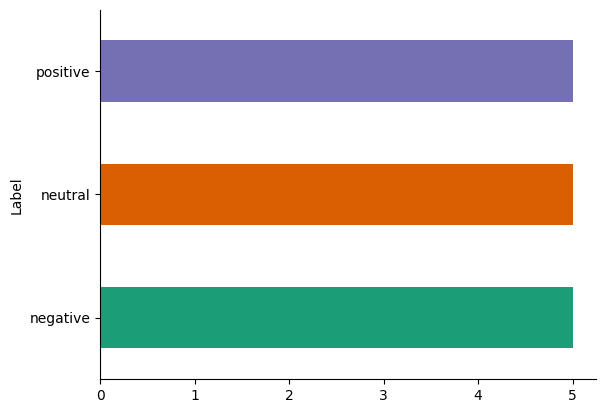

In [23]:
# @title Label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Sentiment Model (Transformers)**

In [24]:
!pip install transformers --quiet

from transformers import pipeline

# Load pretrained sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Test the model
test = sentiment_pipeline("The contract was breached with malicious intent.")
print(test)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9985154271125793}]


In [ ]:
results = sentiment_pipeline(df['Text'].tolist())
df['Predicted Label'] = [r['label'].lower() for r in results]
df['Confidence'] = [round(r['score'], 3) for r in results]
df.head()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Predicted Label', palette='coolwarm')
plt.title("📊 Sentiment Distribution (Predicted)")
plt.show()


In [26]:
import pandas as pd
import random

positive = [
    "The court finds in favor of the petitioner.",
    "Agreement reached amicably between parties.",
    "Accused acquitted due to lack of evidence."
]
negative = [
    "The defendant is guilty of negligence.",
    "Contract was breached with malicious intent.",
    "The appeal was dismissed without merit."
]
neutral = [
    "The hearing is scheduled for next week.",
    "The parties have filed their written statements.",
    "The matter involves jurisdictional issues."
]

data = positive + negative + neutral
labels = ['positive'] * len(positive) + ['negative'] * len(negative) + ['neutral'] * len(neutral)
random.shuffle(data)

df = pd.DataFrame({'Text': data, 'Label': labels})
df.to_csv("legal_sample_dataset.csv", index=False)
df.head()



,Text,Label
0,The defendant is guilty of negligence.,positive
1,Accused acquitted due to lack of evidence.,positive
2,The appeal was dismissed without merit.,positive
3,The hearing is scheduled for next week.,negative
4,The court finds in favor of the petitioner.,negative


In [30]:
from google.colab import files
files.download("legal_sample_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
results = sentiment_pipeline(df['Text'].tolist())
df['Predicted Label'] = [r['label'].lower() for r in results]
df['Confidence'] = [round(r['score'], 3) for r in results]
df.head()


,Text,Label,Predicted Label,Confidence
0,The parties are advised to submit their statem...,neutral,negative,0.994
1,The defendant is found guilty on all charges.,negative,positive,0.965
2,This case involves multiple jurisdictions and ...,neutral,positive,0.530
3,The hearing is adjourned until next Monday.,neutral,negative,0.805
4,This appeal is frivolous and lacks merit.,negative,negative,1.000


/tmp/ipython-input-32-2527909438.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



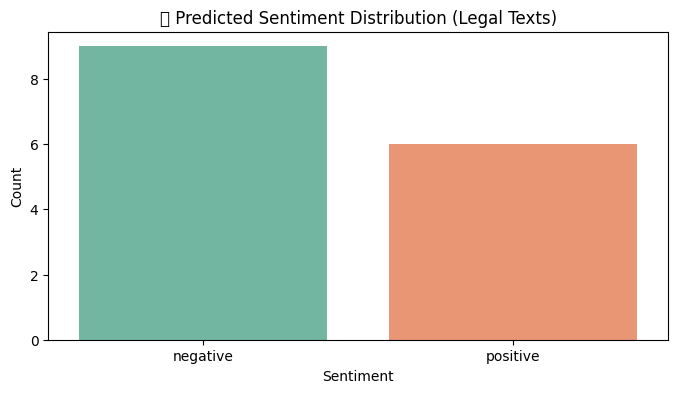

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Predicted Label', palette='Set2')
plt.title("📊 Predicted Sentiment Distribution (Legal Texts)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [33]:
comparison = pd.crosstab(df['Label'], df['Predicted Label'])
print("Confusion Matrix:")
print(comparison)


Confusion Matrix:
Predicted Label  negative  positive
Label                              
negative                4         1
neutral                 4         1
positive                1         4


In [34]:
if 'Label' in df.columns:
    mismatches = df[df['Label'] != df['Predicted Label']]
    print("❌ Misclassified Examples:")
    display(mismatches[['Text', 'Label', 'Predicted Label', 'Confidence']].head(10))


❌ Misclassified Examples:


,Text,Label,Predicted Label,Confidence
0,The parties are advised to submit their statem...,neutral,negative,0.994
1,The defendant is found guilty on all charges.,negative,positive,0.965
2,This case involves multiple jurisdictions and ...,neutral,positive,0.530
3,The hearing is adjourned until next Monday.,neutral,negative,0.805
10,The respondent was present in court on the men...,neutral,negative,0.559
13,The accused was released due to lack of evidence.,positive,negative,0.999
14,The law requires a mandatory waiting period be...,neutral,negative,0.992


In [ ]:
while True:
    txt = input("🧾 Enter a legal statement (or type 'exit'): ")
    if txt.lower() == 'exit':
        break
    res = sentiment_pipeline(txt)[0]
    print(f"→ {res['label']} ({res['score']:.2%} confidence)")


🧾 Enter a legal statement (or type 'exit'): he was crying hard enough before  dying
→ NEGATIVE (99.30% confidence)
🧾 Enter a legal statement (or type 'exit'): Will you safe me?
→ POSITIVE (95.81% confidence)
🧾 Enter a legal statement (or type 'exit'): You can save me.
→ POSITIVE (99.91% confidence)
🧾 Enter a legal statement (or type 'exit'): He saved me.
→ POSITIVE (99.97% confidence)
🧾 Enter a legal statement (or type 'exit'): I am safe.
→ POSITIVE (99.98% confidence)
🧾 Enter a legal statement (or type 'exit'): Saved by myself.
→ POSITIVE (99.92% confidence)


In [ ]:
while True:
    txt = input("🧾 Enter a legal statement (or type 'exit'): ")
    if txt.lower() == 'exit':
        break
    res = sentiment_pipeline(txt)[0]
    print(f"→ {res['label']} ({res['score']:.2%} confidence)")


Authored by Abdul Basit Noor | Powered by Synergy Spheres **3.0** **bold text** **bold text**